<a href="https://colab.research.google.com/github/funmeen/legendary-eureka/blob/main/Ensemble_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Heart.csv')
df.head()
df = df.drop(columns = 'Unnamed: 0')
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df.isnull().sum()
df = df.dropna()
df


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [13]:
X = df.drop(columns = 'AHD')
Y = df['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 21)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [14]:
classf_report = classification_report(y_test, y_pred)
print("Classification Report:", classf_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)
accuracy = accuracy_score(y_test, y_pred)
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1_score = 2 * (precision * recall)/(precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Classification Report:               precision    recall  f1-score   support

           0       0.68      0.83      0.75        46
           1       0.76      0.59      0.67        44

    accuracy                           0.71        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.71      0.71        90

Confusion Matrix: [[38  8]
 [18 26]]
Accuracy: 0.7111111111111111
Precision: 0.7647058823529411
Recall: 0.5909090909090909
F1-score: 0.6666666666666667


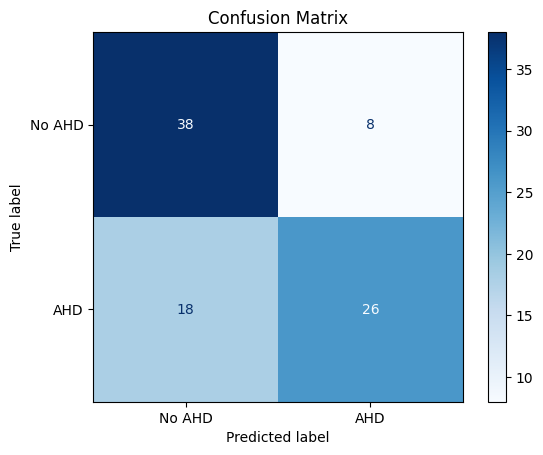

In [16]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues', display_labels=["No AHD", "AHD"])
plt.title("Confusion Matrix")
plt.show()